# Øving X - for de som mangler en øving


**Denne øvingen har ingen veiledningstime, den er ment som krisehjelp til de som mangler en øving**

**Innleveringsfrist:** Torsdag 11. april, kl 12.00.


**Oppgave 1**
I denne oppgaven skal vi studere Lamberts W-funksjon for reelle argumenter, dvs vi ser på reelle argumenter med reelle verdier. Funksjonen er implisitt definert ved

$$
    y=W(x)\quad\text{der}\quad x=ye^y
$$

Fordi funksjonen $ye^y$ ikke er en til en så vil generelt $W(x)$ kunne ta mer enn én verdi for en gitt $x$.

**a)** Vis at 
* $W(x),\ x\in\mathbb{R}$ er kun definert (med reell verdi) for $x\geq -e^{-1}$
* $W(x)$ har entydig verdi hvis $x\geq 0$ eller $x=-e^{-1}$
* $W(x)$ har to verdier hvis $-e^{-1}< x < 0$


**b)** Vis at dersom $-e^{-1}< x < 0$ så fins én rot i intervallet $(-1,0)$ og én rot i intervallet
$(2\ln(-x),-1)$. Vis at dersom $x>0$ så fins en rot i intervallet $(0,\ln(1+x))$.

Nå til $-e^{-1}<x<0$: Vi vet fra **a)** at det fins en rot i intervallet $(-1,0)$. Når vi skal studere
intervallet $(-\infty,-1)$ ser vi på funksjonen $g(y)=y\,e^{y/2}+1$. Denne har nøyaktig ett kritisk punkt, nemlig i
$y=-2$ som vi finner er et globalt minimum. $g(-2)=1-\frac{2}{e}>0$ så $g(y)>0$ for alle $y$.
Da er også $0<e^{y/2}g(y)=ye^y+e^{y/2}$ slik at $ye^y > -e^{y/2}$. For en rot $y^*$ i ligningen
er $x=y^* e^{y^*} > -e^{y^*/2}$ som impliserer $e^{y^*/2}>-x$ eller $y^* > 2\ln(-x)$.

**c)** Lag et Python-program som beregner $W(x)$ for alle $x\geq -e^{-1}$ ved intervallhalveringsmetoden, og beregn begge verdier dersom $-e^{-1}< x < 0$. Gjør gjerne bruk av programmet fra Øving 1 (f.eks. løsningsforslag på Bb).

**Selvsjekk** $W(-0.1)=\{-0.11183\cdots, -3.5771\cdots\}$. Kontroller også mot oppgitte funksjonsverdier i Oppgave 2.

**Oppgave 2**
Vi interpolerer nå Lambert's W-funksjon. Den tar følgende verdier 

$$
\begin{array}{|r|cccc|}
\hline
x    & 0 & 1.0 & 2.0    & 3.0  \\
W(x) &0 & 0.5671  & 0.8526 & 1.0499 \\ \hline
\end{array}
$$

Utfør beregningene nedenfor med Python

**a)** Lag tabell over dividerte differenser for disse dataene, og bestem et 3. gradspolynom som interpolerer dataene.


**b)** Sammenlign resultatet du får fra Oppgave 1 med verdien av interpolasjonspolynomet for $x=1.5$.


In [68]:
import numpy as np

def regula_falsi_improved2(x, a, b, tol = 1e-3):
    """Bisection method for solving the equation f(x) = 0
    
    Performs the bisection method on the interval [a,b].
    We assume a<b, f(a)*f(b) < 0.
    We stop the method when we have bracketed the root up to the tolerance tol.
    """
    assert a<b, "a is not strictly smaller than b."
    assert tol>0., "tol is not a positive real number."
    fa = f(a)-x
    fb = f(b)-x
    assert fa*fb<0., "The value of f at a and b seems to have the same sign."

    while abs(b-a) > tol :
        c  = (a+b)/2.0
        fc = f(c) -x

        if fa*fc < 0 :
            b  = c
            fb = fc
        else:
            a  = c
            fa = fc
    return c

def f(y):
    return y*np.exp(y)

def function(x):
    if x < -np.exp(-1.0):
        return -1.0
    if x==0:
        return 0.0
    elif x==-np.exp(-1):
        return -1.0

    if x > 0:
        a = 0
        b = np.log(1+x)
        y = regula_falsi_improved2(x, a, b)
        return y;
    else:
        a1 = -1
        b1 = 0
        y1 = regula_falsi_improved2(x, a1, b1)
        
        a2 = 2*np.log(-x)
        b2 = -1
        y2 = regula_falsi_improved2(x, a2, b2)
        return np.array([y1,y2])
        
x = np.linspace(0,3,1000)
y_vals = np.array([])

for i in x:
    yval = function(i)
    y_vals = np.append(y_vals, yval)
    

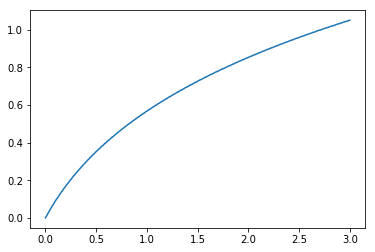

In [69]:
import matplotlib.pyplot as plt
plt.plot(x,y_vals)
plt.show()

In [92]:
x = np.linspace(0,3,4)
Y = np.array([])
for i in x:
    yval = function(i)
    Y = np.append(Y, yval)
    
print(x)
print(Y)

def newton_coefficients(x,y): #This method yields wrong mid-coefficients, but the correct end coefficients.
    n = len(x)
    a = y.copy()
    for i in range(1,n):
        a[i:n] = (a[i:n]-a[i-1])/(x[i:n]-x[i-1])
    return a

def newton2(x,y):
    n = len(x)
    a = y.copy()
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = (a[i]-a[i-1])/(x[i]-x[i-j])
            
    return a

a = newton_coefficients(x,Y)
a2 = newton2(x,Y)
print("----Ferdig----")
print(a)
print(a2)


[ 0.  1.  2.  3.]
[ 0.          0.56656659  0.8523901   1.04987429]
---------
[ 0.          0.56656659  0.8523901   1.04987429]
[ 0.          0.56656659  0.42619505  0.3499581 ]
------------
[ 0.          0.56656659  0.42619505  0.3499581 ]
[ 0.          0.56656659 -0.14037154 -0.10830425]
------------
[ 0.          0.56656659 -0.14037154 -0.10830425]
[ 0.          0.56656659 -0.14037154  0.03206729]
------------
----Ferdig----
[ 0.          0.56656659 -0.14037154  0.03206729]
[ 0.          0.56656659 -0.14037154  0.03206729]


In [ ]:
def p(x,X_list,Y):
    a = newton2(X_list,Y)
    sum = a[0]
    for i in range(1,len(a)):
        a[i]*(x-X_list[i])
    return sum
